#0. Basic settings

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
root = '/gdrive/My Drive'

Mounted at /gdrive


In [ ]:
import torch
!pip install face_recognition

     |████████████████████████████████| 100.2MB 111kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=99df3c2fe3fc0aa100226bb020e6142a2d71b49304774df192140b3128a02ff5
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from PIL import Image
import face_recognition

import matplotlib.pylab as plt

In [ ]:
import numpy as np
import cv2
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import pandas as pd

#1. Find faces in a photograph

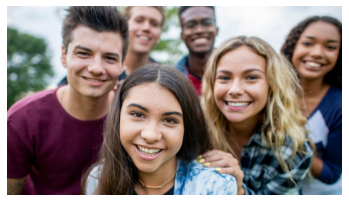

In [ ]:
# load the jpg file into a numpy array
image=face_recognition.load_image_file('/gdrive/My Drive/image.jpg')
# image=face_recognition.load_image_file('/gdrive/My Drive/Colab Notebooks/maskImage.jpg')

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# Find all the faces in the image using a pre-trained convolutional neural network.
# This method is more accurate than the default HOG model, but it's slower
# unless you have an nvidia GPU and dlib compiled with CUDA extensions. But if you do,
# this will use GPU acceleration and perform well.
# See also: find_faces_in_picture.py
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))

I found 6 face(s) in this photograph.


In [ ]:
print(type(image))

<class 'numpy.ndarray'>


A face is located at pixel location Top: 62, Left: 850, Bottom: 199, Right: 986


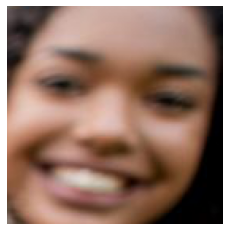

A face is located at pixel location Top: 252, Left: 312, Bottom: 449, Right: 509


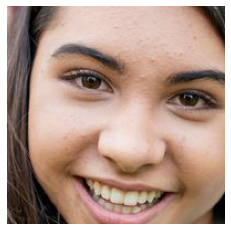

A face is located at pixel location Top: 154, Left: 589, Bottom: 318, Right: 753


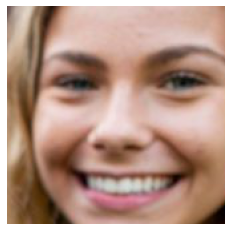

A face is located at pixel location Top: 71, Left: 175, Bottom: 235, Right: 339


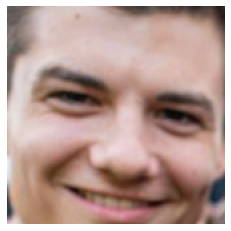

A face is located at pixel location Top: 18, Left: 513, Bottom: 113, Right: 608


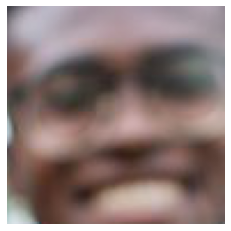

A face is located at pixel location Top: 10, Left: 351, Bottom: 124, Right: 465


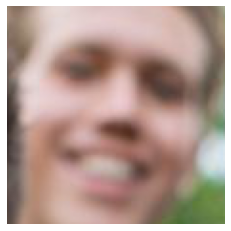

In [ ]:
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    # pil_image = Image.fromarray(face_image)
    # pil_image.show()

    plt.imshow(face_image)
    plt.axis('off')
    plt.show()

#2. Identify specific facial features in a photograph

In [ ]:
from PIL import ImageDraw

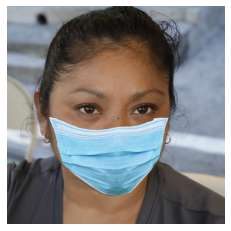

In [ ]:
# load the jpg file into a numpy array
# image=face_recognition.load_image_file('/gdrive/My Drive/Colab Notebooks/image.jpg')
image=face_recognition.load_image_file('/gdrive/My Drive/dataset_synthetic/train/correct/00002_Mask.jpg')

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

I found 0 face(s) in this photograph.


The chin in this face has the following points: [(193, 465), (199, 539), (209, 608), (225, 673), (260, 738), (319, 787), (383, 829), (447, 868), (501, 885), (553, 879), (599, 844), (644, 806), (686, 757), (720, 699), (741, 637), (757, 570), (766, 498)]
The left_eyebrow in this face has the following points: [(277, 412), (320, 386), (378, 384), (430, 402), (479, 430)]
The right_eyebrow in this face has the following points: [(571, 433), (614, 407), (660, 393), (710, 392), (745, 420)]
The nose_bridge in this face has the following points: [(523, 485), (524, 530), (527, 576), (529, 622)]
The nose_tip in this face has the following points: [(454, 640), (486, 652), (522, 659), (555, 653), (582, 643)]
The left_eye in this face has the following points: [(330, 480), (368, 467), (405, 470), (437, 499), (400, 504), (363, 499)]
The right_eye in this face has the following points: [(587, 501), (620, 473), (656, 472), (688, 488), (659, 505), (623, 507)]
The top_lip in this face has the following p

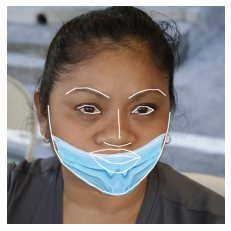

In [ ]:
# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
# pil_image.show()
plt.imshow(pil_image)
plt.axis('off')
plt.show()